<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/Bellmanford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descripcion del problema

El problema dice que queremos encontrar el camino mas corto dentro de un grafo entre un nodo inicial y todos los demas nodos

Por lo que tenemos como entrada nos dice que nos dan el grafo dirigido $G$ como tal ademas del nodo inicial $s$ con el cual vamos a recorrer todo el grafo

Como salida nos va a retornar la distancia mas corta para cada vertice del grafo.

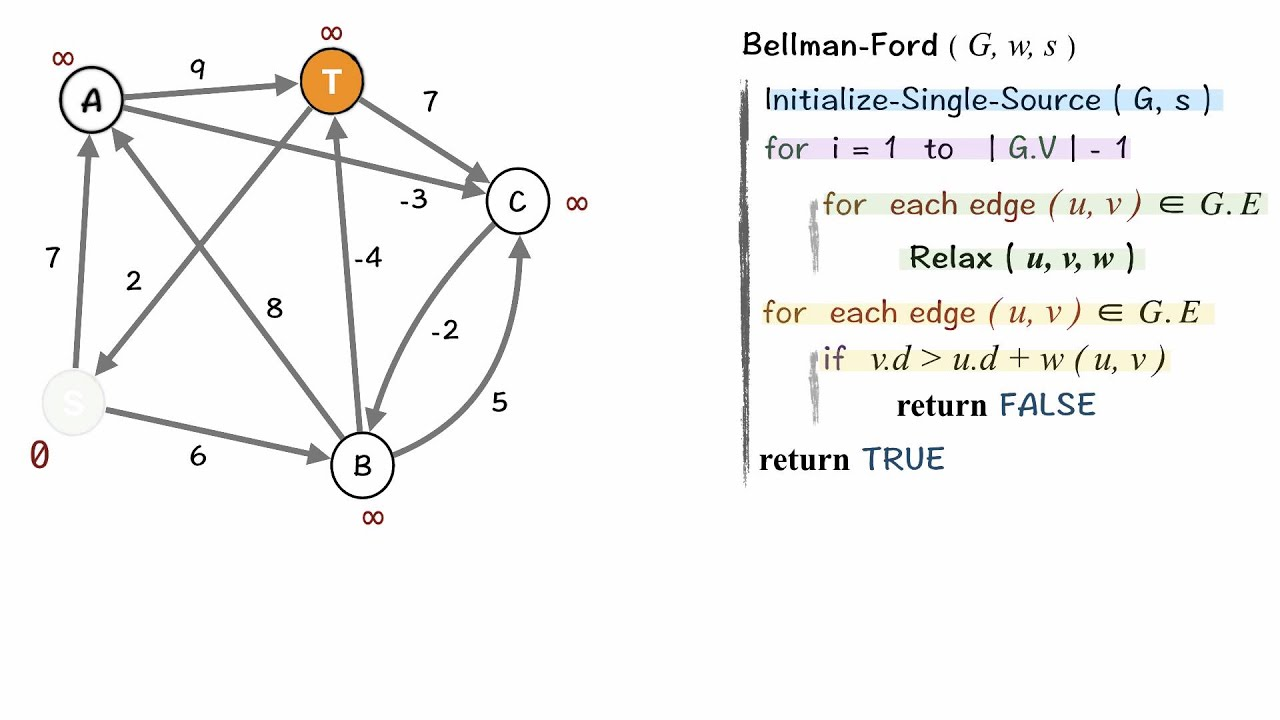

explicar la imagen

## 1.1) Descripcion del algoritmo

```
function bellmanFord(G, S)
  for each vertex V in G
    distance[V] <- infinite
      previous[V] <- NULL
  distance[S] <- 0

  for each vertex V in G				
    for each edge (U,V) in G
      tempDistance <- distance[U] + edge_weight(U, V)
      if tempDistance < distance[V]
        distance[V] <- tempDistance
        previous[V] <- U

  for each edge (U,V) in G
    If distance[U] + edge_weight(U, V) < distance[V}
      Error: Negative Cycle Exists

  return distance[], previous[]

```

El algoritmo va recorriendo el grafo de forma tal que va compararndo los pesos de los arcos que conectan cada nodo entonces va comparando cada peso de dichos arcos hasta encontrar el minimo, ademas ve si hay un nodo intermedio entre nodos para luego calcular y verificar el minimo peso de cada caso para asi poder retornarlos al final y asi va recorriendo todos los nodos comparando los pesos de sus arcos para finalmente encontrar el minimo.

# 2) Codigo

### Instancias varias, estas se muestras al final del informe

In [24]:
from math import log
from random import randint
from timeit import repeat

import matplotlib.pyplot as plt
import networkx as nx
import random
import sys

%matplotlib inline

In [25]:
def instance_generator_positive(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 50))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 50)) # 1 y 50 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 50)) # 1 y 50 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [26]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [27]:
def list_to_adj_matrix(graph_list, n):
    """
        Input: Un grafo en formato list[tuple].
        Ej: [(x1, y1, peso1), (x2, y2, peso2), ...].
        Output: Matriz de adyacencia del grafo.
    """
    m = len(graph_list)
    adjMat = [[0 for i in range(n)]for j in range(n)]
    for _ in range(m):
        for (x, y, peso) in g2:
            adjMat[x][y] = peso
    return adjMat

In [47]:
def graficador(grafo, n):

    grafoNX = graph_to_nxdigraph(grafo, n)
    pos = nx.circular_layout(grafoNX)
    labels = nx.get_edge_attributes(grafoNX, 'weight')

    nx.draw_networkx(grafoNX, pos)
    nx.draw_networkx_edge_labels(grafoNX, pos, edge_labels = labels)
    plt.show()

In [29]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

## 2.1) Bellmam-ford

In [38]:
class GraphA():
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # utility function used to print the solution
    def printArr(self, dist):
        print("Vertex Distance from Source")
        for i in range(self.V):
            print("{0}\t\t{1}".format(i, dist[i]))
 
    # The main function that finds shortest distances from src to
    # all other vertices using Bellman-Ford algorithm. The function
    # also detects negative weight cycle
    def BellmanFord(self, src, verbose = False, visualize = False, print_solution = True):
 
        # Step 1: Initialize distances from src to all other vertices
        # as INFINITE
        dist = [float("Inf")] * self.V
        dist[src] = 0
        if verbose:
            print("Inicia arreglo distancias: ")
            print(dist, "\n")
        # Step 2: Relax all edges |V| - 1 times. A simple shortest
        # path from src to any other vertex can have at-most |V| - 1
        # edges
        for x in range(self.V - 1):
            # Update dist value and parent index of the adjacent vertices of
            # the picked vertex. Consider only those vertices which are still in
            # queue
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
            if verbose:
              print(f'Arreglo de distancias en iteración {x + 1}: {dist}')        
 
        # Step 3: check for negative-weight cycles. The above step
        # guarantees shortest distances if graph doesn't contain
        # negative weight cycle. If we get a shorter path, then there
        # is a cycle.
        if verbose: 
          print("\n Buscando ciclos negativos: ")

        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                if print_solution:
                    print("El grafo contiene un ciclo negativo")
                dist = list()
                return dist
 
        if verbose:
            print()
        if print_solution:
            print("No existen ciclos negativos\n")
            self.printArr(dist)
        if visualize:
            graficador(self.graph, self.V)

In [42]:
n = 5
g, root = instance_generator(n)
print(g, root, n)
grafo = GraphA(n)
for (x, y, peso) in g:
    grafo.addEdge(x, y, peso)
grafo.BellmanFord(root)

[(4, 1, -6), (1, 0, 12), (0, 3, 47), (0, 2, 48), (2, 3, 80), (2, 3, 63), (2, 1, 82), (0, 4, -3)] 4 5
No existen ciclos negativos

Vertex Distance from Source
0		6
1		-6
2		54
3		53
4		0


## 2.2) Dijkstra’s

In [72]:
class GraphB():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
        self.aristas = list()
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def newEdge(self, u, v, w):
        self.aristas.append((u, v, w)) 
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = sys.maxsize
 
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src, verbose = False, visualize = False, print_solution = True):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        if verbose:
            print("Inicializando arreglo de distancias: ")
            print(dist, "\n")
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)


            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                        dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]
            if verbose:
                print("Arreglo de distancias en iteración ", cout + 1, " : " ,  dist)
 
        if verbose:
            print()
        if print_solution:
            self.printSolution(dist)
        if visualize:
            graficador(self.aristas, self.V)

In [66]:
n2 = 5
g2, root2 = instance_generator_positive(n2)
adjMat = list_to_adj_matrix(g2, n2)
grafo2 = GraphB(n2)

grafo2.graph = adjMat
grafo2.dijkstra(root2)

Vertex 	Distance from Source
0 	 26
1 	 31
2 	 0
3 	 63
4 	 55


## 2.3) $Visualize$ $ = $ $True$

## 2.3.1) *Bellman-Ford Visualize True*

No existen ciclos negativos

Vertex Distance from Source
0		77
1		5
2		71
3		0
4		87
5		36
6		99
7		76
8		39
9		50


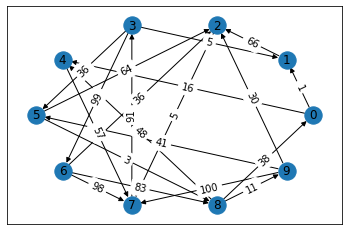

In [51]:
n = 10
g, root = instance_generator(n)
#print(g, root, n)
grafo = GraphA(n)
for (x, y, peso) in g:
    grafo.addEdge(x, y, peso)
grafo.BellmanFord(root, False, True)

## 2.3.2) *Dijkstra Visualize True*

Vertex 	Distance from Source
0 	 48
1 	 7
2 	 121
3 	 48
4 	 88
5 	 0
6 	 14
7 	 15
8 	 53
9 	 9


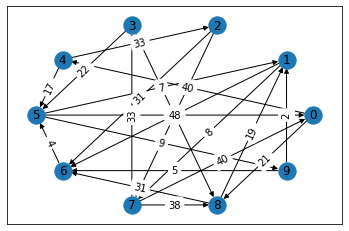

In [52]:
n2 = 10
g2, root2 = instance_generator_positive(n2)
m = len(g2)
adjMat = list_to_adj_matrix(g2, n2)
grafo2 = GraphB(n2)

for (x, y, peso) in g2:
    grafo2.newEdge(x, y, peso)

grafo2.graph = adjMat
grafo2.dijkstra(root2, False, True)

## 2.4) $Verbose$ $ = $ $True$

Bellman-Ford

In [54]:
n = 10
g, root = instance_generator(n)
#print(g, root, n)
grafo = GraphA(n)
for (x, y, peso) in g:
    grafo.addEdge(x, y, peso)
grafo.BellmanFord(root, True)

Inicia arreglo distancias: 
[inf, 0, inf, inf, inf, inf, inf, inf, inf, inf] 

Arreglo de distancias en iteración 1: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 2: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 3: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 4: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 5: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 6: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 7: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 8: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]
Arreglo de distancias en iteración 9: [40, 0, 9, 63, 156, 207, 134, 120, 128, 88]

 Buscando ciclos negativos: 

No existen ciclos negativos

Vertex Distance from Source
0		40
1		0
2		9
3		63
4		156
5		207
6		134
7		120
8		128
9		88


Dijkstra

In [71]:
n2 = 5
g2, root2 = instance_generator_positive(n2)
m = len(g2)
adjMat = list_to_adj_matrix(g2, n2)
grafo2 = GraphB(n2)
grafo2.graph = adjMat
grafo2.dijkstra(root2, True)

Inicializando arreglo de distancias: 
[9223372036854775807, 0, 9223372036854775807, 9223372036854775807, 9223372036854775807] 

Arreglo de distancias en iteración  1  :  [37, 0, 20, 9223372036854775807, 26]
Arreglo de distancias en iteración  2  :  [22, 0, 20, 34, 26]
Arreglo de distancias en iteración  3  :  [22, 0, 20, 34, 26]
Arreglo de distancias en iteración  4  :  [22, 0, 20, 34, 26]
Arreglo de distancias en iteración  5  :  [22, 0, 20, 34, 26]

Vertex 	Distance from Source
0 	 22
1 	 0
2 	 20
3 	 34
4 	 26


# 3) Correctitud

*$Teorema$:* Si un grafo $G = (V, E)$ no contiene ciclos negativos, entonces el algoritmo retorna correctamente la distancia minima desde un nodo inicial hasta otro nodo de $G$.

*$Induccion$:* Luego de la iteracion de $i, v, d$ es a lo mas el peso de cada camino desde el noodo inicial hasta $v$, usando a lo mas $i$ aristas, $∀_v \in V$.

Antes de cada iteración $i, v, d \leqslant min \begin{Bmatrix}
 w(p) :  |p| \leq i - 1 \\
\end{Bmatrix}$, donde |p| corresponde a laa cantidad de aristas de p.

La funcion relaxation solo puede igualar o diminuir el valor de $v, d$, por lo que se mantiene verdadero.

La iteracion $i$ considera todos los camninos por igual o menor cantidad de aristas que $i$ al aplicar relax sobre las nuevas aristas.

Por lo tanto, se demuestra que el algoritmo computa el camino mas corto para todos los grafos sin ciclos negativos.

# 4) Tiempo de ejecución

Bellman-ford 

Este algoritmo posee una complejidad temporal de $O(V, E): O(V)$ para inicializar los valores de la lista de costos, $O(V, E)$ para la ejecucion de la funcion relax y $O(E)$ para el bucle que revisa si existen ciclos negativos.
$T(n) = O(V) + O(V * E) + O(E) = O(V * E)$ 

Dijkstra

Este otro algoritmo posee una complejidad temporal de $O(V^2):$ el algoritmo al tener 2 bucles "$for$ " aninados, ambos con ranfo desde 0 hasta $V$, por lo que la complejidad resulta en $O(V^2)$.

# 5) Experimentos

In [80]:
def experimento(n):
    g, root = instance_generator(n)
    grafo = GraphA(n)
    for (x, y, peso) in g:
        grafo.addEdge(x, y, peso)
    return grafo.BellmanFord(root, False, False, False)

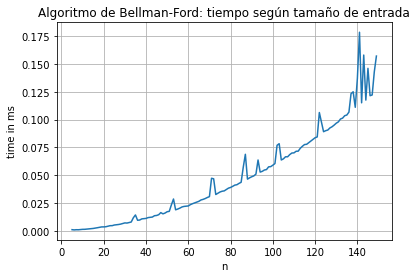

In [81]:
x = []
y = []

times = []

for n in range(5, 150):
    t = repeat(setup="from __main__ import is_valid_edge, instance_generator, GraphA, experimento", stmt=f'experimento({n})', repeat=25, number=10)
    x.append(n)
    times.append(t)
    
for i in times:
    a = sum(i)
    a = a/25
    y.append(a)

plt.plot(x, y)

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("Algoritmo de Bellman-Ford")

plt.grid()
plt.show()

### 6) Codigos extra funcionales

### Generador de instancias 

In [73]:
from math import log
from random import randint
from timeit import repeat

import matplotlib.pyplot as plt
import networkx as nx
import random
import sys

%matplotlib inline

In [7]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [19]:
def instance_generator_positive(n: int):
    
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 50))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 50)) # 1 y 50 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 50)) # 1 y 50 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

### Libreria Networkx

In [17]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [4]:
def graficador(grafo, n):

    grafoNX = graph_to_nxdigraph(grafo, n)
    pos = nx.circular_layout(grafoNX)
    labels = nx.get_edge_attributes(grafoNX, 'weight')

    nx.draw_networkx(grafoNX, pos)
    nx.draw_networkx_edge_labels(grafoNX, pos, edge_labels = labels)
    nx.draw(pos, node_color="purple", with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width=2.0, edge_color ="black")
    plt.show()

In [11]:
def list_to_adj_matrix(graph_list, n):
    """
        Input: Un grafo en formato list[tuple].
        Ej: [(x1, y1, peso1), (x2, y2, peso2), ...].
        Output: Matriz de adyacencia del grafo.
    """
    m = len(graph_list)
    adjMat = [[0 for i in range(n)]for j in range(n)]
    for _ in range(m):
        for (x, y, peso) in g2:
            adjMat[x][y] = peso
    return adjMat